<a href="https://colab.research.google.com/github/yahdiarif/customer_retail_k-mean_clustering/blob/main/Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing


In [ ]:
df = pd.read_csv("retail_dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [ ]:
#mengambil nama-nama kolom
nama_kolom = df.columns.tolist()
print(nama_kolom)

['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity', 'price', 'payment_method', 'invoice_date', 'shopping_mall']


# Data Cleansing

In [ ]:
#mengecek apakah ada kolom yang kosong
df.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [ ]:
#cek duplikat data
duplikat = df.duplicated()
jumlah_duplikat = duplikat.sum()
jumlah_duplikat

0

# Exploratory Data

## Deskriptif

In [ ]:
df.sample(5)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
39852,I300768,C725843,Female,23,Clothing,2,600.16,Debit Card,1/6/2021,Metropol AVM
1742,I323718,C102567,Male,29,Clothing,1,300.08,Cash,12/5/2021,Metrocity
68953,I313267,C806702,Female,34,Technology,3,3150.00,Debit Card,16/08/2021,Emaar Square Mall
410,I215373,C310628,Female,20,Clothing,5,1500.40,Debit Card,17/09/2021,Kanyon
91706,I545690,C260706,Male,32,Books,3,45.45,Cash,30/11/2022,Mall of Istanbul


In [ ]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


## Visualisasi

In [ ]:
nums = ['age','quantity','price']
cats = ['gender','category','payment_method','shopping_mall']

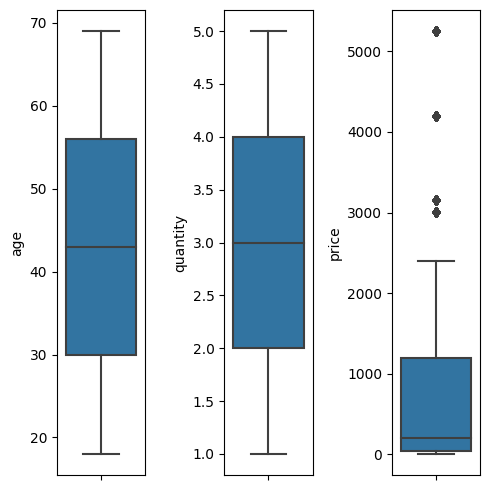

In [ ]:
plt.figure(figsize=(5,5),dpi=100)
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]])
    plt.tight_layout()
plt.show()

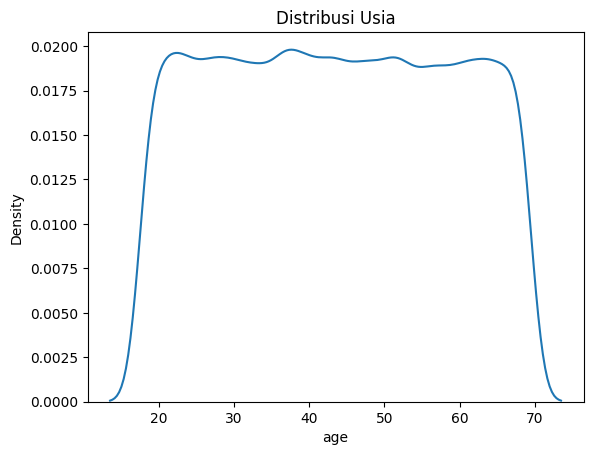

In [ ]:
sns.kdeplot(df['age'])
plt.title('Distribusi Usia')
plt.show()

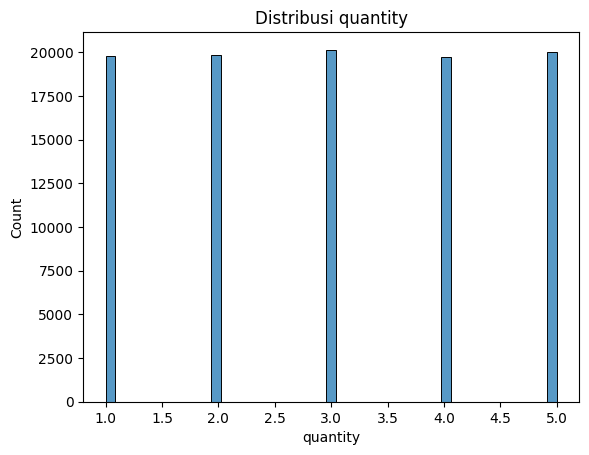

In [ ]:
sns.histplot(df['quantity'])
plt.title('Distribusi quantity')
plt.show()

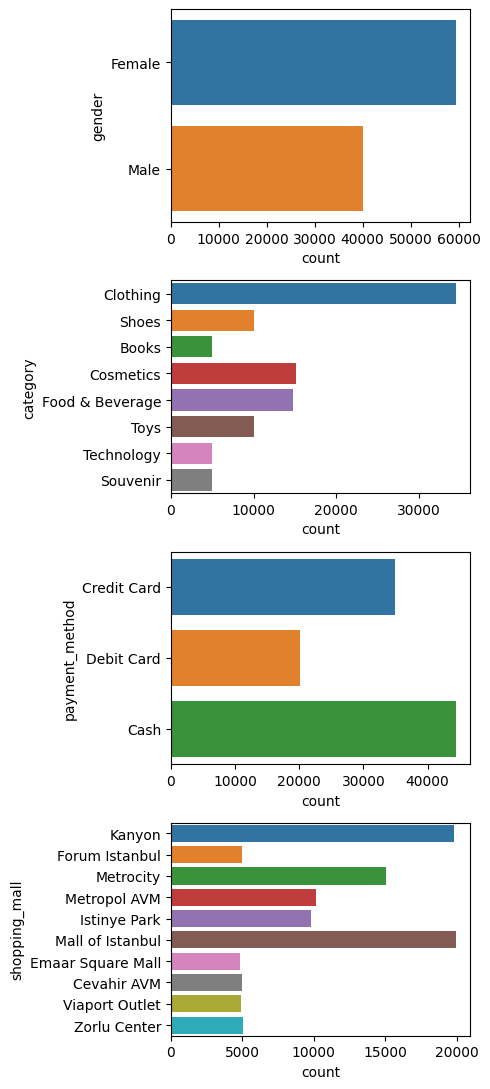

In [ ]:
plt.figure(figsize=(5, 11), dpi=100)
for i in range(len(cats)):
    plt.subplot(len(cats), 1, i + 1)
    sns.countplot(y=df[cats[i]])
    plt.ylabel(cats[i])
    plt.tight_layout()
plt.show()

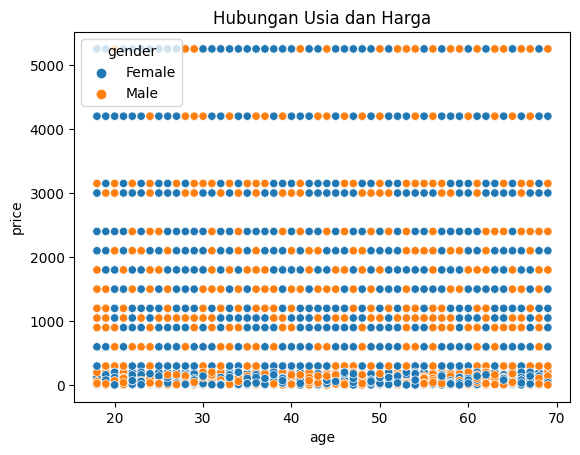

In [ ]:
sns.scatterplot(data=df, x='age', y='price', hue='gender')
plt.title('Hubungan Usia dan Harga')
plt.show()

# Handle outlier

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['price']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 99457
Jumlah baris setelah memfilter outlier: 94433


# Cluster K-mean


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
selected_features = ['age', 'quantity', 'price']
df_segmentation = df[selected_features]


In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_segmentation)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

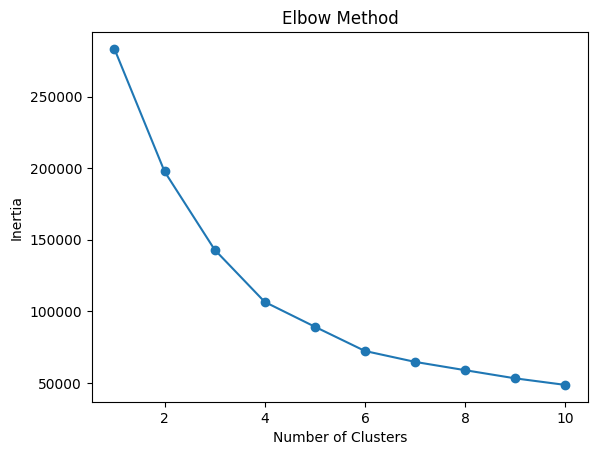

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [ ]:
k = 3  # jumlah kluster optimal dari Elbow di atas
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
df['cluster_label'] = kmeans.labels_


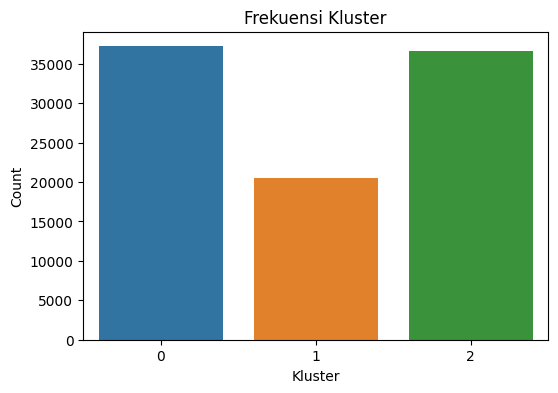

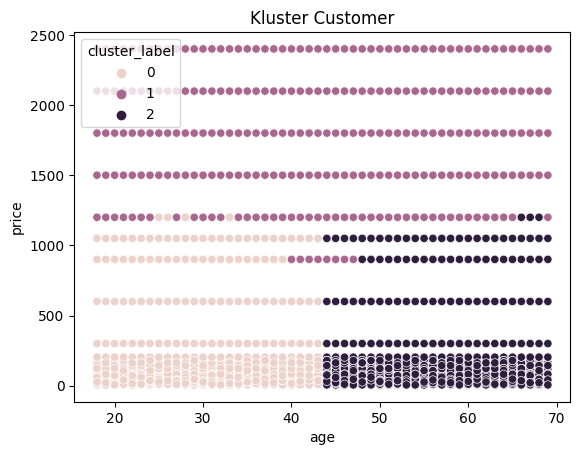

In [ ]:
# Frekuensi kluster
cluster_counts = df['cluster_label'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.title('Frekuensi Kluster')
plt.xlabel('Kluster')
plt.ylabel('Count')
plt.show()

# Visualisasi kluster
sns.scatterplot(data=df, x='age', y='price', hue='cluster_label')
plt.title('Kluster Customer')
plt.show()
